In [3]:
#importing required libraries
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from copy import deepcopy
from timeit import timeit

In [4]:
import globalRandomSearch as GRS
import gradientDescent as GD
import globalRandomSearchPopulation as GRSP
import getFunctions
import contourPlot as cp

Solving for 1st function

function: 8*(x - 9)**4 + 6*(y - 1)**2
Time taken to execute Global Random Search algorithm = 0.7001 seconds
Time taken to execute Gradient Descent algorithm = 0.6349 seconds
Time taken to execute Global Population Based Search Algorithm = 2.2612 seconds
Minimum, using Global Random Search Algorithm = 0.8756957711631667
Minimum, using Gradient Descent Algorithm = 7.582689611418492e-05
Minimum, using Global Population Based Search Algorithm = 7.582689611418492e-05


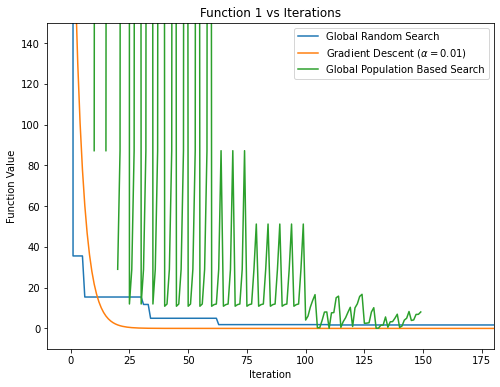

In [12]:
# get the function
func, df = getFunctions.getFunction(1)

# number of parameters
n = 2
# min and max of each parameters
xrange = [[2, 9], [-1, 6]]
x_init = [7,7]

# number of iterations
num_iter = 500

GRSP_N, GRSP_M, GRSP_ni = 20, 5, 10

# calculating the execution time
GRS_time = timeit(lambda: GRS.global_random_search(func, n, xrange, N=num_iter, is_timed=True), number=1000)
GD_time = timeit(lambda: GD.gradient_descent(func, df, n, x_init, N=num_iter, is_timed=True), number=1000)
GRSP_time = timeit(lambda: GRSP.global_random_search_population(func, n, xrange, N=GRSP_N, M=GRSP_M, num_iters=GRSP_ni, is_timed=True), number=1000)

print(f'Time taken to execute Global Random Search algorithm = {round(GRS_time, 4)} seconds')
print(f'Time taken to execute Gradient Descent algorithm = {round(GD_time, 4)} seconds')
print(f'Time taken to execute Global Population Based Search Algorithm = {round(GRSP_time, 4)} seconds')

# 
GRS_xs, GRS_fs = GRS.global_random_search(func, n, xrange, N=num_iter)
GD_xs, GD_fs = GD.gradient_descent(func, df, n, x_init, N=num_iter)
GRSP_xs, GRSP_fs = GRSP.global_random_search_population(func, n, xrange, N=GRSP_N, M=GRSP_M, num_iters=GRSP_ni)

print(f'Minimum, using Global Random Search Algorithm = {GRS_fs[-1]}')
print(f'Minimum, using Gradient Descent Algorithm = {GD_fs[-1]}')
print(f'Minimum, using Global Population Based Search Algorithm = {GD_fs[-1]}')

# Plot function values vs iterations
plt.figure(figsize=(8, 6))
plt.plot(range(num_iter), GRS_fs, label='Global Random Search')
plt.plot(range(len(GD_fs)), GD_fs, label='Gradient Descent ($\\alpha=0.01$)')
plt.plot(np.ravel(GRSP_fs), label='Global Population Based Search')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Function 1 vs Iterations')
plt.xlim(-10, 180)
plt.ylim(-10, 150)
plt.legend()
plt.show()

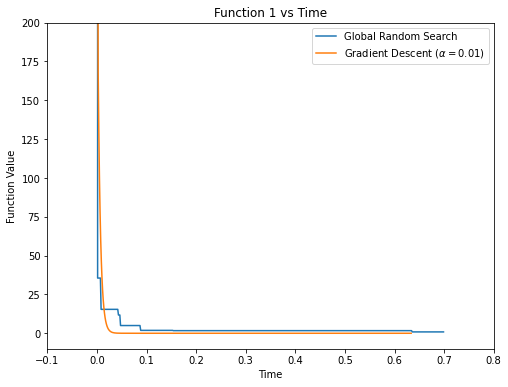

In [19]:
# Plot function values vs time
GRS_ti = GRS_time / len(GRS_fs)
GRSP_ti = GRSP_time / len(GRSP_fs)
GD_ti = GD_time / len(GD_fs)
X_GRS = list(range(len(GRS_fs)))
X_GRSP = list(range(len(GRSP_fs)))
X_GD = list(range(len(GD_fs)))
X_time_GRS = np.array(X_GRS) * GRS_ti
X_time_GRSP = np.array(X_GRSP[:GRSP_ni]) * GRSP_ti
X_time_GD = np.array(X_GD) * GD_ti

plt.figure(figsize=(8, 6))
plt.plot(X_time_GRS, GRS_fs, label='Global Random Search')
plt.plot(X_time_GD, GD_fs, label=f'Gradient Descent ($\\alpha=0.01$)')
# plt.plot(X_time_GRSP, GRSP_fs[GRSP_ni-1], label='Global Population Based Search')
plt.xlabel('Time')
plt.ylabel('Function Value')
plt.title('Function 1 vs Time')
plt.xlim(-0.1, 0.8)
plt.ylim(-10, 200)
plt.legend()
plt.show()

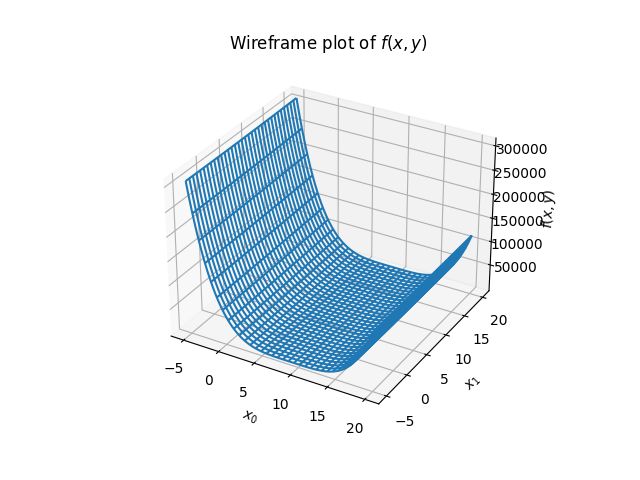

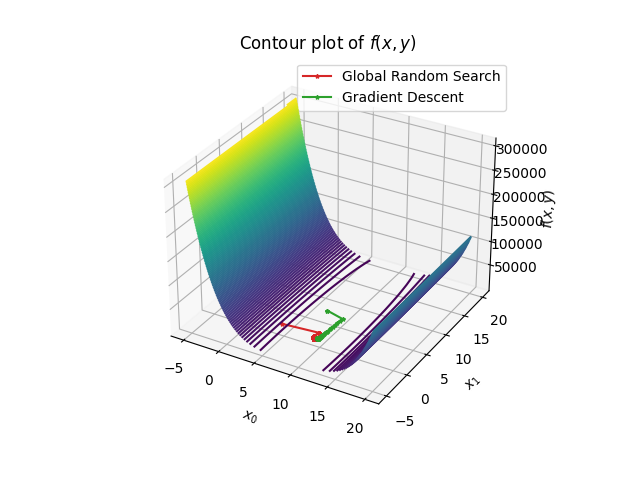

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the x and y ranges as 1D arrays
x = np.linspace(-5, 20, 100)
y = np.linspace(-5, 20, 100)

# Use meshgrid to create 2D coordinate arrays
x, y = np.meshgrid(x, y)

# Evaluate the function over the meshgrid
z = func(x, y)
GRS_xs_np = np.array(GRS_xs)
GD_xs_np = np.array(GD_xs)

# Enable the interactive backend
%matplotlib widget

# Contour plot
fig1, ax1 = plt.subplots(subplot_kw=dict(projection='3d'))
ax1.contour3D(x, y, z, 120)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax1.set_zlabel('$f(x, y)$')
ax1.set_title('Contour plot of $f(x, y)$')

# Wireframe plot
fig2, ax2 = plt.subplots(subplot_kw=dict(projection='3d'))
ax2.plot_wireframe(x, y, z, rstride=3, cstride=3)
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')
ax2.set_zlabel('$f(x, y)$')
ax2.set_title('Wireframe plot of $f(x, y)$')

# GRS_xs_np = np.array(GRS_xs)
# Plot function values of GRS
ax1.plot(GRS_xs_np[:, 0], GRS_xs_np[:, 1], GRS_fs, color='tab:red', marker='*', markersize=3, label='Global Random Search')

# Plot function values of GD
ax1.plot(GD_xs_np[:, 0], GD_xs_np[:, 1], GD_fs, color='tab:green', marker='*', markersize=3, label='Gradient Descent')

# Plot function values of GRSP
# ax2.plot(GRSP_xs[:, 0], GRSP_xs[:, 1], GRSP_fs, color='tab:red', marker='o', markersize=3, label='Global Population Based Search')

ax1.legend()
plt.show()

Solving for 2nd function

function: 6*Abs(y - 1) + Max(0, x - 9)
Time taken to execute Global Random Search algorithm = 1.5118 seconds
Time taken to execute Gradient Descent algorithm = 3.2875 seconds
Time taken to execute Global Population Based Search Algorithm = 3.8989 seconds
Minimum, using Global Random Search Algorithm = 0.0219075877729642
Minimum, using Gradient Descent Algorithm = 1.0125233984581428e-13
Minimum, using Global Population Based Search Algorithm = 1.0125233984581428e-13


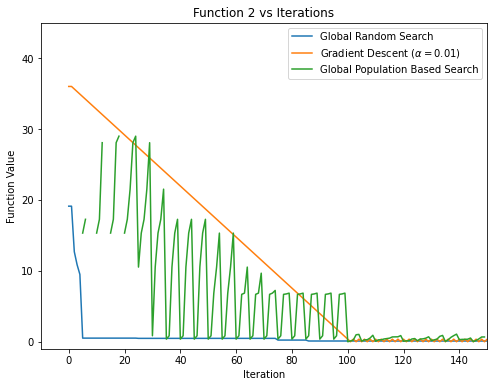

In [22]:
# get the function
func, df = getFunctions.getFunction(2)

# number of parameters
n = 2
# min and max of each parameters
xrange = [[0, 5], [0, 5]]
xrange = [[2, 9], [-1, 6]]
x_init = [7,7]

# number of iterations
num_iter = 500

GRSP_N, GRSP_M, GRSP_ni = 20, 5, 10

# calculating the execution time
GRS_time = timeit(lambda: GRS.global_random_search(func, n, xrange, N=num_iter, is_timed=True), number=1000)
GD_time = timeit(lambda: GD.gradient_descent(func, df, n, x_init, N=num_iter, is_timed=True), number=1000)
GRSP_time = timeit(lambda: GRSP.global_random_search_population(func, n, xrange, N=GRSP_N, M=GRSP_M, num_iters=GRSP_ni, is_timed=True), number=1000)

print(f'Time taken to execute Global Random Search algorithm = {round(GRS_time, 4)} seconds')
print(f'Time taken to execute Gradient Descent algorithm = {round(GD_time, 4)} seconds')
print(f'Time taken to execute Global Population Based Search Algorithm = {round(GRSP_time, 4)} seconds')

# 
GRS_xs, GRS_fs = GRS.global_random_search(func, n, xrange, N=num_iter)
GD_xs, GD_fs = GD.gradient_descent(func, df, n, x_init, N=num_iter)
GRSP_xs, GRSP_fs = GRSP.global_random_search_population(func, n, xrange, N=GRSP_N, M=GRSP_M, num_iters=GRSP_ni)

print(f'Minimum, using Global Random Search Algorithm = {GRS_fs[-1]}')
print(f'Minimum, using Gradient Descent Algorithm = {GD_fs[-1]}')
print(f'Minimum, using Global Population Based Search Algorithm = {GD_fs[-1]}')

# Plot function values vs iterations
plt.figure(figsize=(8, 6))
plt.plot(range(num_iter), GRS_fs, label='Global Random Search')
plt.plot(range(len(GD_fs)), GD_fs, label='Gradient Descent ($\\alpha=0.01$)')
plt.plot(np.ravel(GRSP_fs), label='Global Population Based Search')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Function 2 vs Iterations')
plt.xlim(-10, 150)
plt.ylim(-1, 45)
plt.legend()
plt.show()

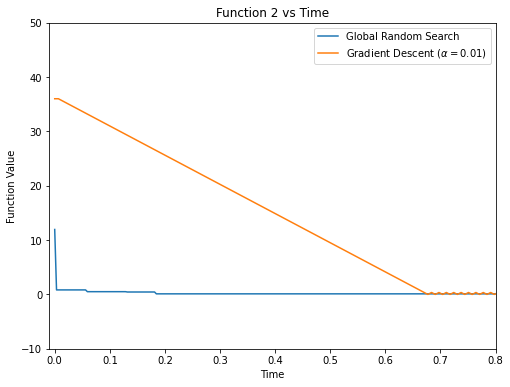

In [9]:
# Plot function values vs time
GRS_ti = GRS_time / len(GRS_fs)
# GRSP_ti = GRSP_time / len(GRSP_fs)
GD_ti = GD_time / len(GD_fs)
X_GRS = list(range(len(GRS_fs)))
# X_GRSP = list(range(len(GRSP_fs)))
X_GD = list(range(len(GD_fs)))
X_time_GRS = np.array(X_GRS) * GRS_ti
# X_time_GRSP = np.array(X_GRSP) * GRSP_ti
X_time_GD = np.array(X_GD) * GD_ti

plt.figure(figsize=(8, 6))
plt.plot(X_time_GRS, GRS_fs, label='Global Random Search')
plt.plot(X_time_GD, GD_fs, label=f'Gradient Descent ($\\alpha=0.01$)')
plt.xlabel('Time')
plt.ylabel('Function Value')
plt.title('Function 2 vs Time')
plt.xlim(-0.01, 0.8)
plt.ylim(-10, 50)
plt.legend()
plt.show()

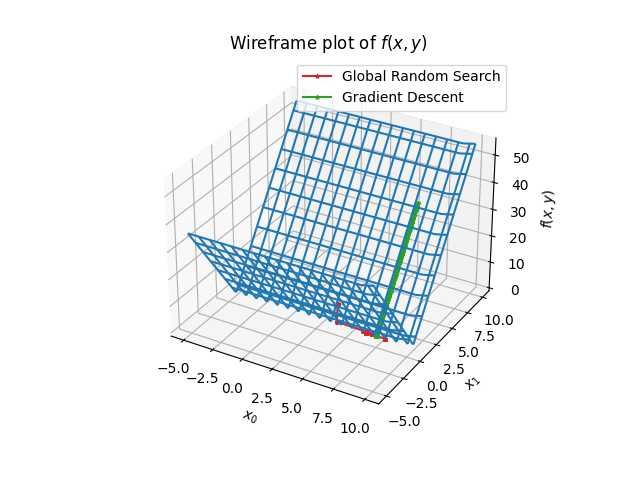

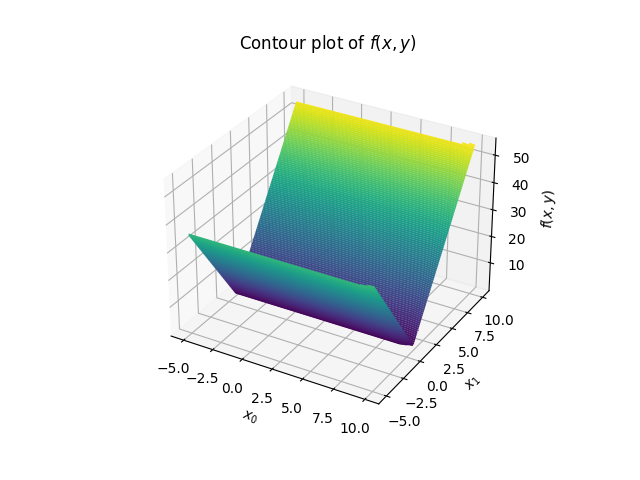

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the x and y ranges as 1D arrays
x = np.linspace(-5, 10, 100)
y = np.linspace(-5, 10, 100)

# Use meshgrid to create 2D coordinate arrays
x, y = np.meshgrid(x, y)

# Evaluate the function over the meshgrid
z = func(x, y)
GRS_xs_np = np.array(GRS_xs)
GD_xs_np = np.array(GD_xs)

# Enable the interactive backend
%matplotlib widget

# Contour plot
fig1, ax1 = plt.subplots(subplot_kw=dict(projection='3d'))
ax1.contour3D(x, y, z, 120)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax1.set_zlabel('$f(x, y)$')
ax1.set_title('Contour plot of $f(x, y)$')

# Wireframe plot
fig2, ax2 = plt.subplots(subplot_kw=dict(projection='3d'))
ax2.plot_wireframe(x, y, z, rstride=6, cstride=6)
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')
ax2.set_zlabel('$f(x, y)$')
ax2.set_title('Wireframe plot of $f(x, y)$')

# GRS_xs_np = np.array(GRS_xs)
# Plot function values of GRS
ax2.plot(GRS_xs_np[:, 0], GRS_xs_np[:, 1], GRS_fs, color='tab:red', marker='*', markersize=3, label='Global Random Search')

# Plot function values of GD
ax2.plot(GD_xs_np[:, 0], GD_xs_np[:, 1], GD_fs, color='tab:green', marker='*', markersize=3, label='Gradient Descent')

# Plot function values of GRSP
ax2.plot(GRSP_xs[:, 0], GRSP_xs[:, 1], GRSP_fs, color='tab:red', marker='o', markersize=3, label='Global Population Based Search')

ax2.legend()
plt.show()